# Curso de Big Data

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Miércoles 4 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- También deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/11nJY1Frgla45sTgsPiSeOZM9iBM-XRWh/edit?usp=sharing&ouid=105815768529474116534&rtpof=true&sd=true
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se  corregirán sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [37]:
import requests
#Buscamos un espejo en la web de Mercado Libre(ML)
espejo = "espejo redondo 80cm"
url = "https://api.mercadolibre.com/sites/MLA/search?q={}".format(espejo.replace(" ", "%20"))
#Hacemos el pedido en ML y obtenemos el resultado de la búsqueda
resultado = requests.request("GET", url)
print (resultado) #el request se hizo correctamente 
resultado.text


<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"espejo redondo 80cm","paging":{"total":366,"primary_results":366,"offset":0,"limit":50},"results":[{"id":"MLA1100341054","title":"Espejo Redondo Circular 80 Cm Marco Hierro Negro","condition":"new","thumbnail_id":"929222-MLA70350753737_072023","catalog_product_id":null,"listing_type_id":"gold_special","permalink":"https://articulo.mercadolibre.com.ar/MLA-1100341054-espejo-redondo-circular-80-cm-marco-hierro-negro-_JM","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA1641","domain_id":"MLA-MIRRORS","thumbnail":"http://http2.mlstatic.com/D_929222-MLA70350753737_072023-I.jpg","currency_id":"ARS","order_backend":1,"price":21489,"original_price":null,"sale_price":null,"sold_quantity":500,"available_quantity":50,"official_store_id":null,"use_thumbnail_id":true,"accepts_mercadopago":true,"tags":["good_quality_thumbnail","immediate_payment","best_seller_candidate"],"variation_filters":["MIRROR_FRAME_COLOR"],"shippin

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [38]:
import pandas as pd

#Guardamos los resultados de búsqueda en un diccionario (json)
data_espejo = resultado.json()
data_espejo


#Empezamos a crear el dataframe
precios =[]

#Obtenemos del diccionario los precios 
for resultado in data_espejo["results"]:
    precio = resultado.get("price") 
    precios.append({"precio": precio})
                
precios_df = pd.DataFrame(precios)

In [40]:
precios_df #ver el dataframe

,precio
0,21489.00
1,16890.00
2,24200.00
3,41000.00
4,28408.00
5,137085.00
6,83805.78
7,28000.00
8,36500.00
9,36500.00


In [39]:
#Precio promedio
precio_promedio = precios_df["precio"].mean()

# Precio mínimo
precio_minimo = precios_df["precio"].min()

# Precio máximo
precio_maximo = precios_df["precio"].max()

# Resultados
print(f"Precio promedio: {precio_promedio}")
print(f"Precio mínimo: {precio_minimo}")
print(f"Precio máximo: {precio_maximo}")

Precio promedio: 50162.6946
Precio mínimo: 16890.0
Precio máximo: 303300.0


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

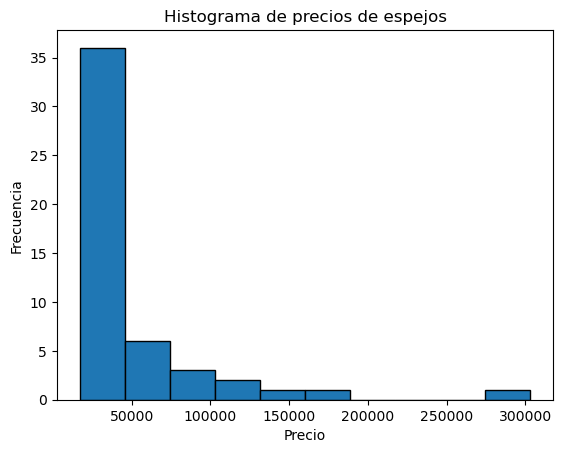

In [44]:
import matplotlib.pyplot as plt

# Creamos el histograma
plt.hist(precios_df["precio"], edgecolor='k')

# Cambiamos cosas del formato
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.title("Histograma de precios de espejos")

plt.show()
# Con el histograma vemos un outlier en los precios: un espejo de alrededor 300 mil pesos. Este precio constituye el máximo precio de la búsqueda. 